<a href="https://colab.research.google.com/github/KrishKanojia/Data-Science-Practice/blob/main/2_Website_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Practice Dataset/website-performance.csv', header=1)
# or
# new_header = data.iloc[0]  # grab the first row for the header
# data = data[1:]  # take the data less the header row
# data.columns = new_header  # set the header row as the df header
# data.reset_index(drop=True, inplace=True)
df.rename(columns={'Session primary channel group (Default channel group)': "Channel"}, inplace=True)
df.head()


,Channel,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Channel                              3182 non-null   object 
 1   Date + hour (YYYYMMDDHH)             3182 non-null   int64  
 2   Users                                3182 non-null   int64  
 3   Sessions                             3182 non-null   int64  
 4   Engaged sessions                     3182 non-null   int64  
 5   Average engagement time per session  3182 non-null   float64
 6   Engaged sessions per user            3182 non-null   float64
 7   Events per session                   3182 non-null   float64
 8   Engagement rate                      3182 non-null   float64
 9   Event count                          3182 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.7+ KB


In [17]:
df.describe()

,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3.182000e+03,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2.024043e+09,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470
std,2.695099e+03,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313
min,2.024041e+09,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.024041e+09,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000
50%,2.024042e+09,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000
75%,2.024043e+09,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000
max,2.024050e+09,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000


In [62]:
df['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(df['Date + hour (YYYYMMDDHH)'], format="%Y%m%d%H")
df["Users"] = pd.to_numeric(df["Users"])
df["Sessions"] = pd.to_numeric(df['Sessions'])

# group data by date and sum up the users and sessions
grouped_data = df.groupby('Date + hour (YYYYMMDDHH)').agg({'Users': 'sum', "Sessions": 'sum'})
grouped_data.head()

,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102


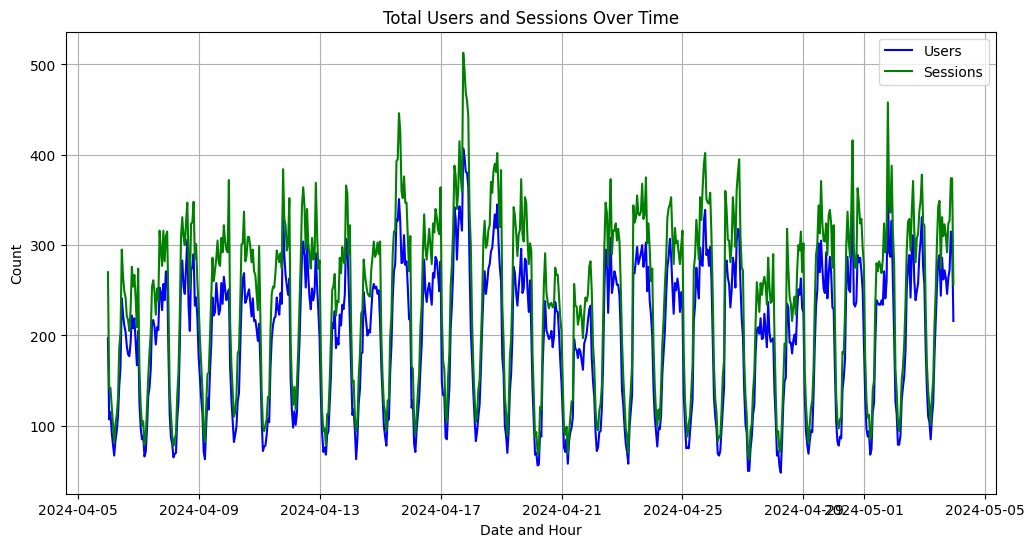

In [19]:
import matplotlib.pyplot as plt

# Plotting the aggregated users and sessions over time
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Users'], label="Users", color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.show
plt.grid(True)
plt.show()

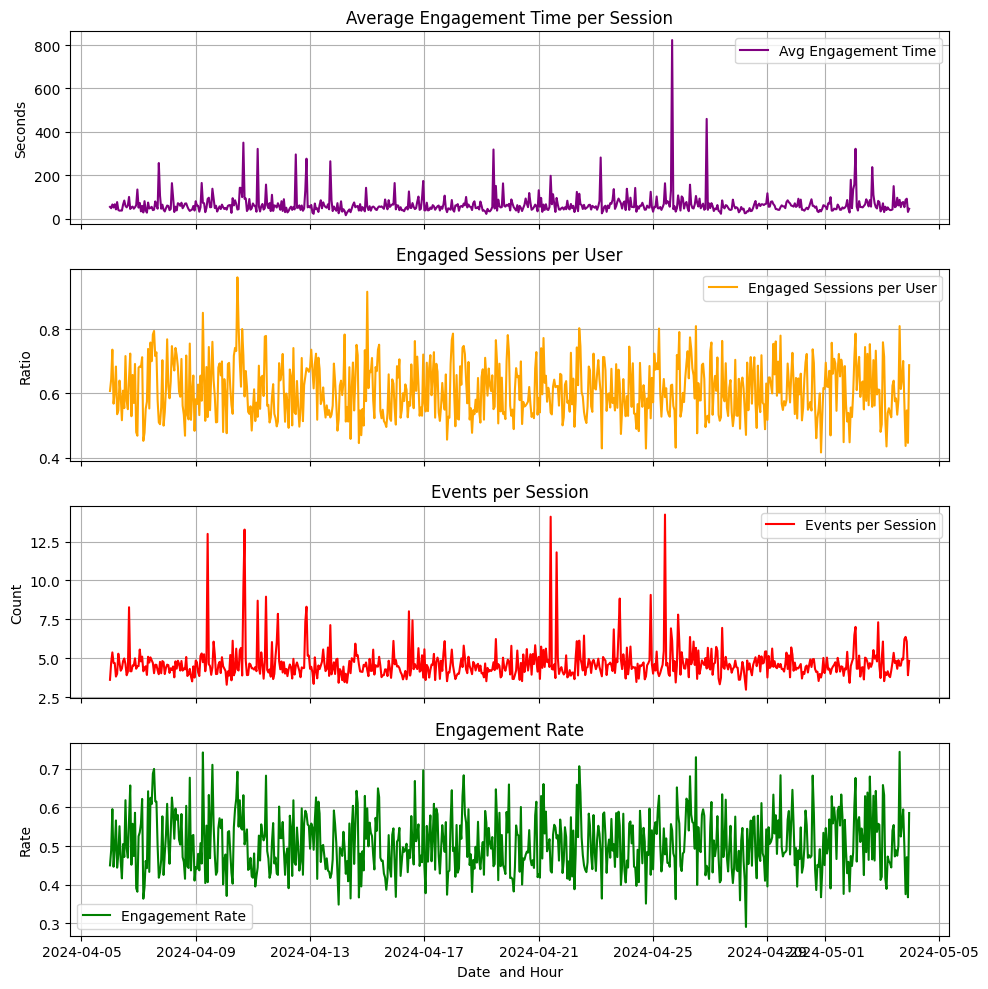

In [20]:
# convert relevant columns to numeric for engagement analysis
df["Engaged sessions"] = pd.to_numeric(df["Engaged sessions"])
df['Average engagement time per session'] = pd.to_numeric(df['Average engagement time per session'])
df["Engaged sessions per user"] = pd.to_numeric(df["Engaged sessions per user"])
df['Events per session'] = pd.to_numeric(df['Events per session'])
df['Engagement rate'] = pd.to_numeric(df['Engagement rate'])

# Group data by date and calculate mean for engagement metrics
engagement_metrics = df.groupby('Date + hour (YYYYMMDDHH)').agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='Purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions per User', color='orange')
ax[1].set_title("Engaged Sessions per User")
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title("Events per Session")
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label="Engagement Rate", color='green')
ax[3].set_title("Engagement Rate")
ax[3].set_ylabel("Rate")
ax[3].set_xlabel("Date  and Hour")

for a in ax:
  a.legend()
  a.grid(True)

plt.tight_layout()
plt.show()

## Analyze Correlations

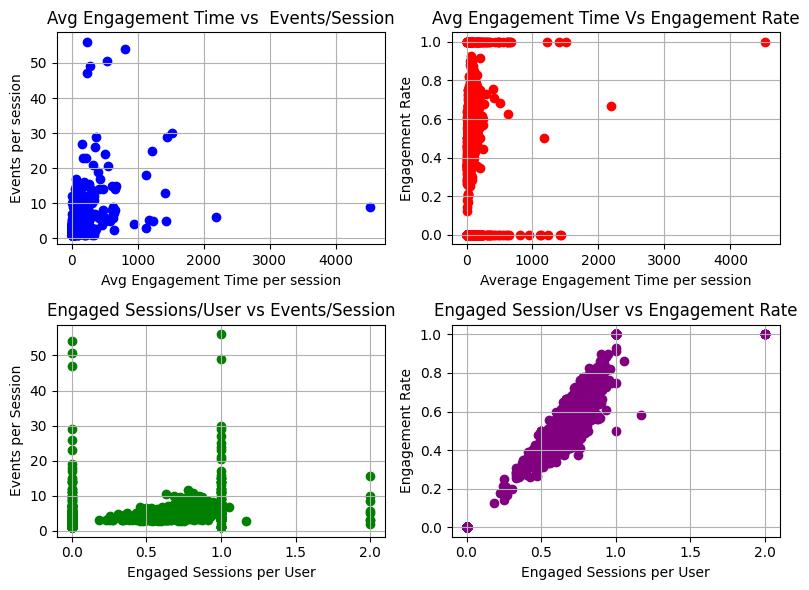

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(df['Average engagement time per session'], df['Events per session'], color='blue')
axes[0, 0].set_title("Avg Engagement Time vs  Events/Session")
axes[0, 0].set_xlabel("Avg Engagement Time per session")
axes[0, 0].set_ylabel("Events per session")
axes[0, 0].grid(True)


# plot 2: engaged engagement time vs engagement rate
axes[0, 1].scatter(df['Average engagement time per session'], df['Engagement rate'], color='red')
axes[0, 1].set_title("Avg Engagement Time Vs Engagement Rate")
axes[0, 1].set_xlabel("Average Engagement Time per session")
axes[0, 1].set_ylabel("Engagement Rate")
axes[0, 1].grid(True)


# plog 3: engaged sessions per user vs events per session
axes[1, 0].scatter(df['Engaged sessions per user'], df['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)


# plot 4: engaged session per user vs engagement rate
axes[1, 1].scatter(df['Engaged sessions per user'], df['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Session/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [22]:
# group data by channel and aggregate necessary metrics
channel_performance = df.groupby("Channel").agg({
    "Users" : "sum",
    "Sessions" : "sum",
    "Engaged sessions": "sum",
    "Events per session" : "mean",
    "Engagement rate" : "mean"
  })

# normalize Engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

channel_performance

,Users,Sessions,Engaged sessions,Events per session,Engagement rate,Normalized Engagement Rate,Normalized Events per Session
Channel,,,,,,,
Direct,30042,37203,17243,4.152344,0.455723,0.599636,0.551880
Email,2,3,1,3.333333,0.333333,0.438596,0.443027
Organic Search,28387,33372,19425,4.070839,0.578906,0.761719,0.541047
Organic Social,47572,60627,32697,4.905193,0.541180,0.712079,0.651939
Organic Video,123,141,109,7.524000,0.760000,1.000000,1.000000
Referral,26774,30990,20653,5.673981,0.660882,0.869582,0.754118
Unassigned,540,559,4,3.533470,0.007514,0.009886,0.469627


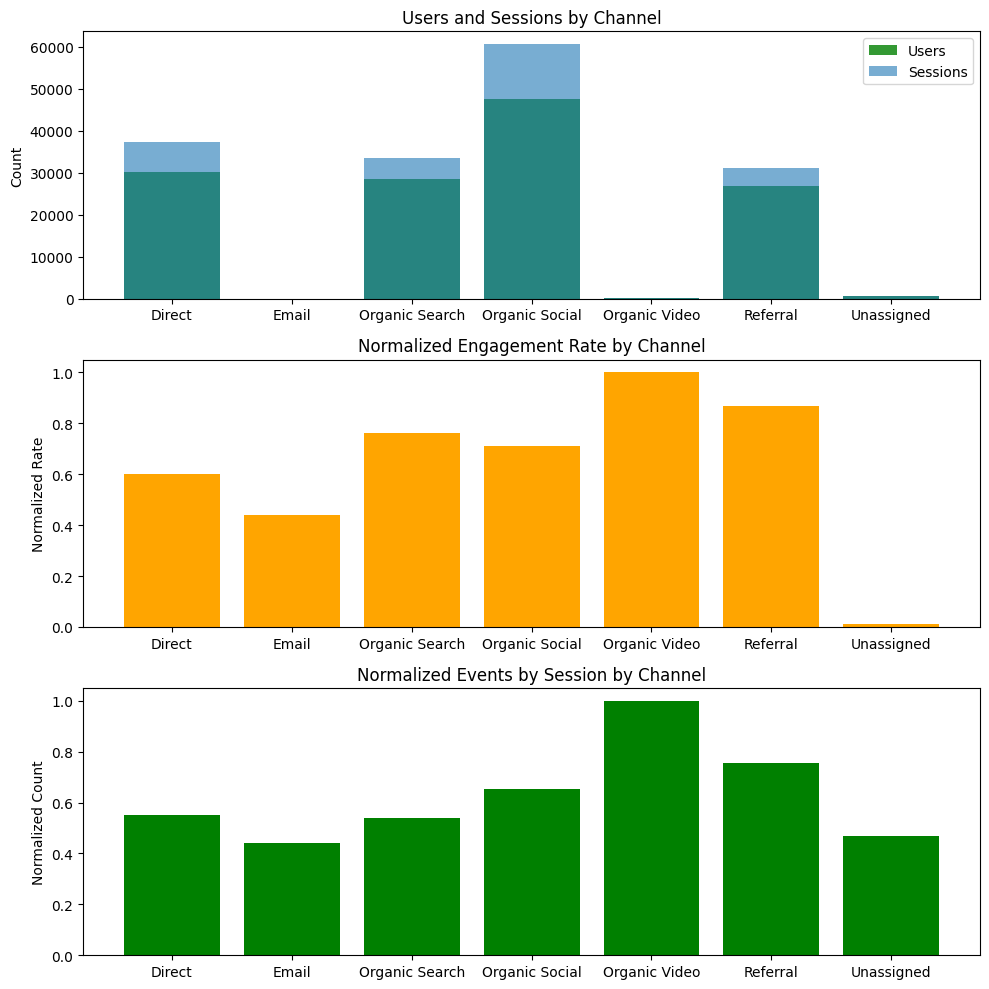

In [23]:
# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8, color="green")
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title("Users and Sessions by Channel")
ax[0].set_ylabel('Count')
ax[0].legend()

# Normalized Engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title("Normalized Engagement Rate by Channel")
ax[1].set_ylabel('Normalized Rate')

# Normalized Events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color="green")
ax[2].set_title("Normalized Events by Session by Channel")
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

## Forecasting Website Traffic

### Non-stationary Data

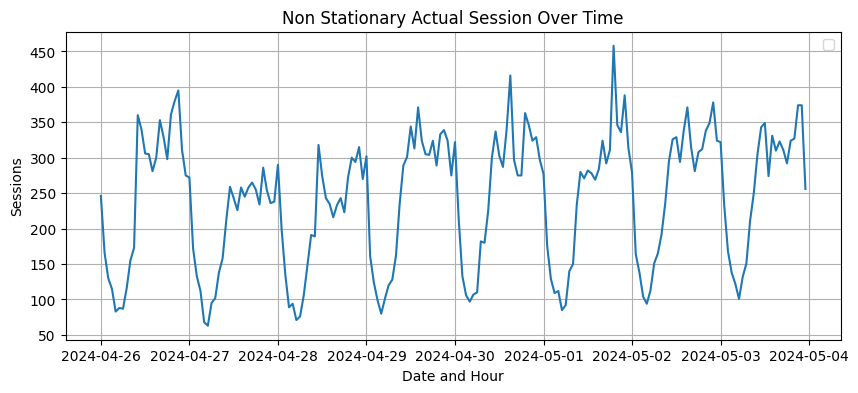

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
differenced_series = time_series_data.diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(time_series_data.index[-192:], time_series_data[-192:])
plt.title("Non Stationary Actual Session Over Time")
plt.xlabel("Date and Hour")
plt.ylabel("Sessions")
plt.legend()
plt.grid(True)
plt.show()

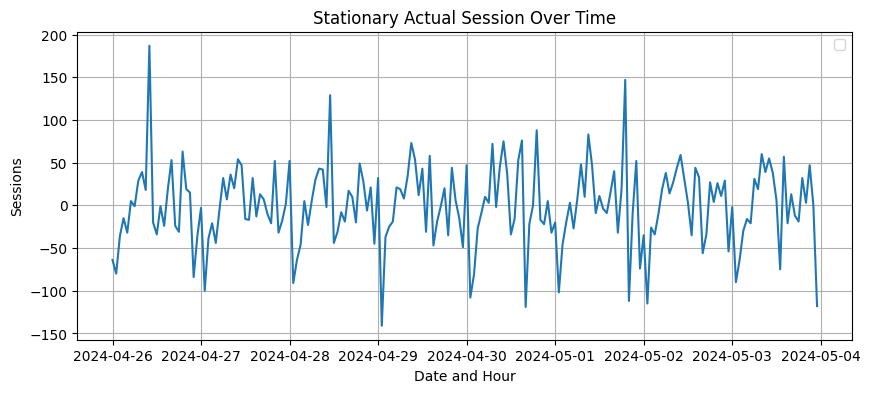

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
differenced_series = time_series_data.diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(differenced_series.index[-192:], differenced_series[-192:])
plt.title("Stationary Actual Session Over Time")
plt.xlabel("Date and Hour")
plt.ylabel("Sessions")
plt.legend()
plt.grid(True)
plt.show()

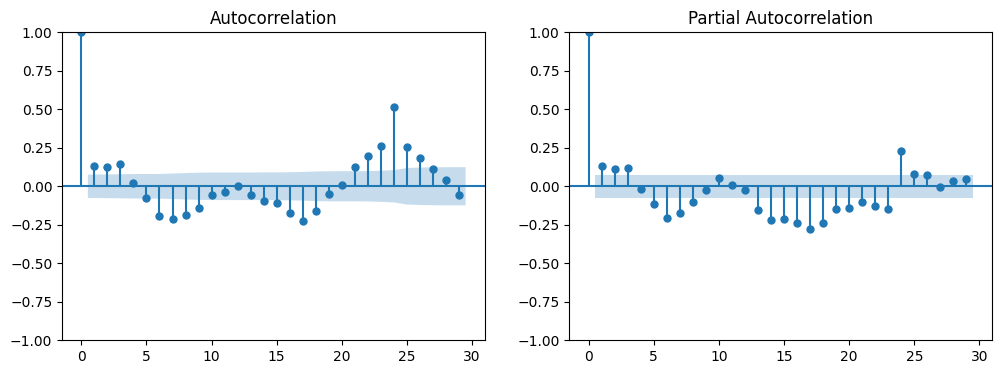

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

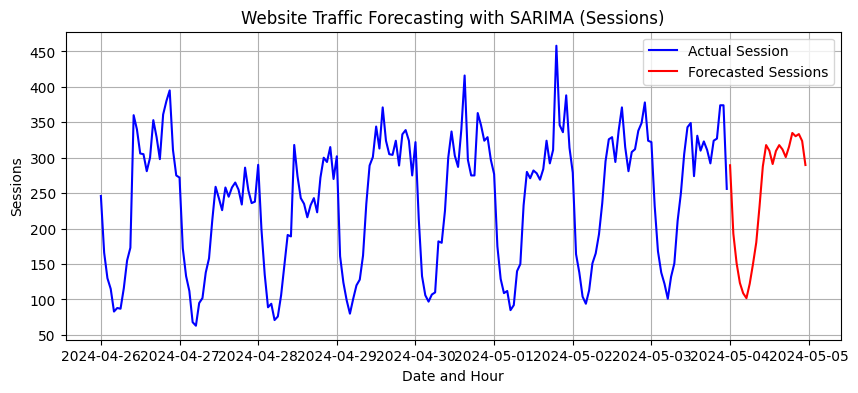

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

sarima_model = SARIMAX(time_series_data,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, seasonal_period))

sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# plotting the actual data and the SARIMAX forecast
plt.figure(figsize=(10, 4))
plt.plot(time_series_data.index[-192:], time_series_data[-192:], label='Actual Session', color='blue') # Last Week Data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
sarima_forecast

2024-05-04 00:00:00    289.336183
2024-05-04 01:00:00    192.968169
2024-05-04 02:00:00    151.150657
2024-05-04 03:00:00    123.335908
2024-05-04 04:00:00    108.807216
2024-05-04 05:00:00    101.884937
2024-05-04 06:00:00    122.230128
2024-05-04 07:00:00    150.084588
2024-05-04 08:00:00    180.492348
2024-05-04 09:00:00    231.682439
2024-05-04 10:00:00    287.707882
2024-05-04 11:00:00    317.835167
2024-05-04 12:00:00    309.852102
2024-05-04 13:00:00    291.118885
2024-05-04 14:00:00    309.520272
2024-05-04 15:00:00    317.771501
2024-05-04 16:00:00    311.724495
2024-05-04 17:00:00    300.912639
2024-05-04 18:00:00    315.527777
2024-05-04 19:00:00    334.946534
2024-05-04 20:00:00    330.336931
2024-05-04 21:00:00    333.364681
2024-05-04 22:00:00    323.585622
2024-05-04 23:00:00    289.707812
Freq: H, Name: predicted_mean, dtype: float64